In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import ternary
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('test files\hdb_results.csv')

In [5]:
def hexColor(r,g,b):
    '''return rgb values as hex string'''
    return '#%02x%02x%02x' % (int(r),int(g),int(b))

#add hex value by individual cell rgb
df['hex'] = df[['rgb_red','rgb_green','rgb_blue']].apply(lambda x:hexColor(*x),axis=1)

In [6]:
#generate dictionary from median cluster channel value to hex
clusters = df['c_label'].unique().tolist()
clusters.remove(-1)

cluster_hex_dict = {}
for cluster in clusters:
    cluster_slice = df[df['c_label']==cluster]
    rgb_values = [cluster_slice['rgb_red'].median(), cluster_slice['rgb_green'].median(), cluster_slice['rgb_blue'].median()]
    
    hex_colour = hexColor(rgb_values[0], rgb_values[1], rgb_values[2])
    
    cluster_hex_dict[cluster] = hex_colour

#assign grey to noise
cluster_hex_dict[-1] = '#919191'

In [7]:
#add hex value by cell cluster median rgb
df['cluster_hex'] = df['c_label'].apply(lambda x:cluster_hex_dict.get(x))

In [8]:
denoise = df['c_label'] != -1
df2 = df[denoise]

100%|█████████████████████████████████████████████████████████████████████████████| 2004/2004 [00:04<00:00, 404.60it/s]


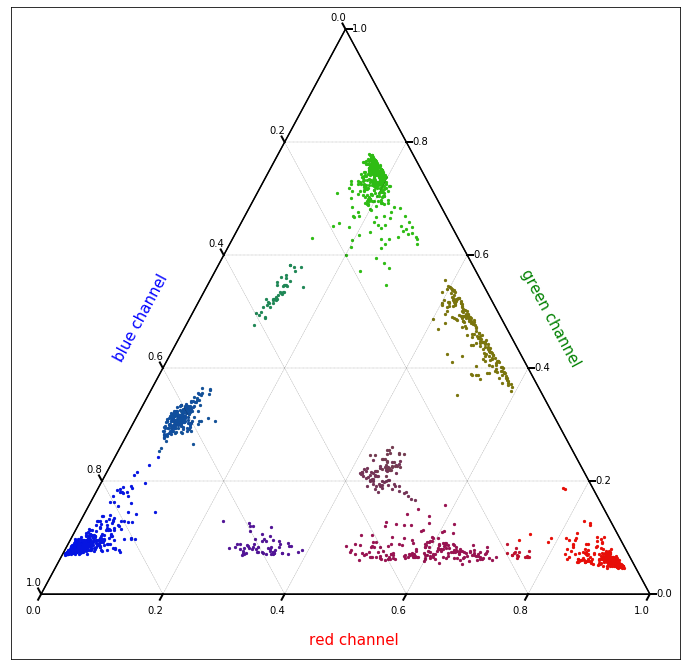

In [9]:
#return cells as ternary plot of RGB channel ration

figure, tax = ternary.figure(scale=1)
figure.set_size_inches(12, 12)
tax.clear_matplotlib_ticks()

tax.boundary(linewidth=1.5)
tax.gridlines(color='black', multiple=0.2, linewidth=0.3)

tax.get_axes().axis('on')
tax.ticks(axis='lbr', linewidth=2, multiple=0.2,tick_formats='%.1f')
tax.boundary(linewidth=1)

tax.bottom_axis_label('red channel', offset=-0.05, fontsize=15, color='red')
tax.right_axis_label('green channel', offset=0.1, fontsize=15, color='green')
tax.left_axis_label('blue channel', offset=0.1, fontsize=15, color='blue')

for i in tqdm(df2.index):
    
    point = [tuple([df2.loc[i].get('ratio_red'),df2.loc[i].get('ratio_green'),df2.loc[i].get('ratio_blue')])]
    color = df2.loc[i].get('cluster_hex')
    
    tax.scatter(point, marker='o', color=color, s=5)
    
ternary.plt.show()

In [8]:
#slight difference when importing kmeans

#use centroid hex value as cluster hex value
#viz k_centres as points

In [9]:
df = pd.read_csv('test files\kmeans_results2.csv')
k_centres = np.load('test files\kmeans_centroids.npy')

In [10]:
df['hex'] = df[['rgb_red','rgb_green','rgb_blue']].apply(lambda x:hexColor(*x),axis=1)

In [11]:
#modules for k means viz with cluster centres

#create dataframe containing centroid values and rgb values to retrun hex colour for viz
cluster_df = pd.DataFrame()

cluster_df['red_centre'] = k_centres[:,0]
cluster_df['green_centre'] = k_centres[:,1]
cluster_df['blue_centre'] = k_centres[:,2]

cluster_df['sum'] = cluster_df['red_centre'] + cluster_df['green_centre'] + cluster_df['blue_centre']

cluster_df['ratio_red'] = (cluster_df['red_centre']/cluster_df['sum'])
cluster_df['ratio_green'] = (cluster_df['green_centre']/cluster_df['sum'])
cluster_df['ratio_blue'] = (cluster_df['blue_centre']/cluster_df['sum'])

cluster_df['rgb_red'] = cluster_df['ratio_red']*255
cluster_df['rgb_green'] = cluster_df['ratio_green']*255
cluster_df['rgb_blue'] = cluster_df['ratio_blue']*255

cluster_df['cluster_hex'] = cluster_df[['rgb_red', 'rgb_green', 'rgb_blue']].apply(lambda x:hexColor(*x),axis=1)

cluster_hex_dict = dict(zip(cluster_df.index,cluster_df['cluster_hex']))
cluster_hex_dict[-1] = '#919191'

df['cluster_hex'] = df['c_label'].apply(lambda x:cluster_hex_dict.get(x))

In [12]:
denoise = df['c_label'] != -1
df2 = df[denoise]

100%|█████████████████████████████████████████████████████████████████████████████| 5044/5044 [00:20<00:00, 250.14it/s]


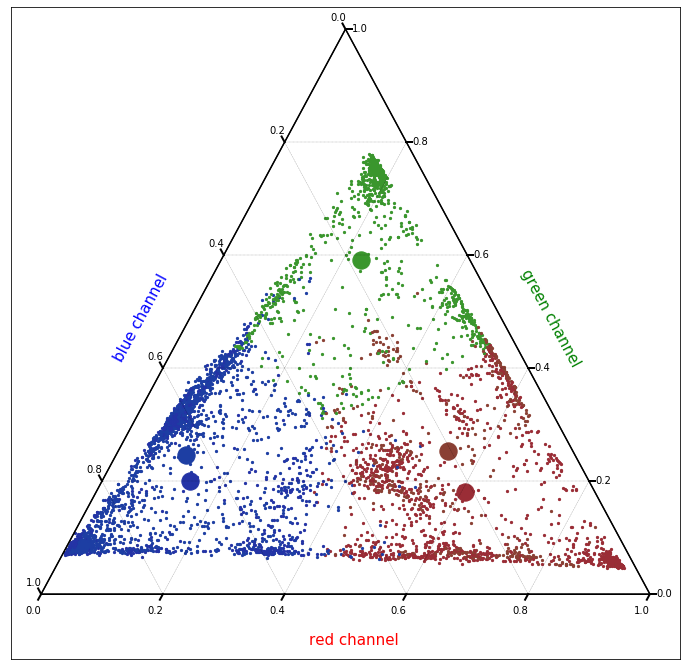

In [13]:
#return cells as ternary plot of RGB channel ration

figure, tax = ternary.figure(scale=1)
figure.set_size_inches(12, 12)
tax.clear_matplotlib_ticks()

tax.boundary(linewidth=1.5)
tax.gridlines(color='black', multiple=0.2, linewidth=0.3)

tax.get_axes().axis('on')
tax.ticks(axis='lbr', linewidth=2, multiple=0.2,tick_formats='%.1f')
tax.boundary(linewidth=1)

tax.bottom_axis_label('red channel', offset=-0.05, fontsize=15, color='red')
tax.right_axis_label('green channel', offset=0.1, fontsize=15, color='green')
tax.left_axis_label('blue channel', offset=0.1, fontsize=15, color='blue')

for i in tqdm(df2.index):
    
    point = [tuple([df2.loc[i].get('ratio_red'),df2.loc[i].get('ratio_green'),df2.loc[i].get('ratio_blue')])]
    color = df2.loc[i].get('cluster_hex')
    
    tax.scatter(point, marker='o', color=color, s=5)

for i in cluster_df.index:
    
    point = [tuple([cluster_df.loc[i].get('ratio_red'),cluster_df.loc[i].get('ratio_green'),cluster_df.loc[i].get('ratio_blue')])]
    color = cluster_df.loc[i].get('cluster_hex')
    
    tax.scatter(point, marker='o', color=color, s=300)

ternary.plt.show()